#### Carga y exploración inicial del dataset

In [7]:
#Cristian Rivas
'''
Descripción del Conjunto de Datos:
Este dataset contiene información detallada sobre la calidad de vinos basada en características fisicoquímicas. 
Incluye medidas como la acidez, contenido de azúcares, nivel de dióxido de azufre, densidad, pH, alcohol, entre otras, 
asociadas a una puntuación de calidad asignada por expertos.

Fuente: UCI Machine Learning Repository
Tamaño: 1143 filas y 13 variables.

Variables:
- Id: Identificador único de cada observación.
- fixed acidity: Cantidad de acidez fija en g/dm³.
- volatile acidity: Cantidad de acidez volátil en g/dm³.
- citric acid: Cantidad de ácido cítrico en g/dm³.
- residual sugar: Cantidad de azúcar residual en g/dm³.
- chlorides: Cantidad de cloruros en g/dm³.
- free sulfur dioxide: Cantidad de dióxido de azufre libre en mg/dm³.
- total sulfur dioxide: Cantidad de dióxido de azufre total en mg/dm³.
- density: Densidad del vino en g/cm³.
- pH: Nivel de pH del vino.
- sulphates: Cantidad de sulfatos en g/dm³.
- alcohol: Porcentaje de alcohol en el vino (% vol.).
- quality: Puntuación de calidad del vino en una escala de 3 a 8.
'''

# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Cargar el dataset localmente
df = pd.read_csv("4_WineQT.csv")

# Vista inicial del dataset
print("--- Información Inicial del Dataset ---")
print(f"Cantidad de filas: {df.shape[0]}, Cantidad de columnas: {df.shape[1]}")
print("\n--- Primeras 5 Filas del Dataset ---")
display(df.head())  # Usar display para una visualización más clara

# Crear una tabla con información adicional: valores nulos, no nulos y tipos de datos
info_dataset = pd.DataFrame({
    'Columna': df.columns,
    'Valores No Nulos': df.notnull().sum(),
    'Valores Nulos': df.isnull().sum(),
    'Tipo de Dato': df.dtypes
}).reset_index(drop=True)

print("\n--- Información Detallada del Dataset ---")
display(info_dataset)  # Mostrar la tabla con display

# Identificar y eliminar duplicados
filas_iniciales = df.shape[0]
df_sin_duplicados = df.drop_duplicates()
filas_finales = df_sin_duplicados.shape[0]
filas_duplicadas = filas_iniciales - filas_finales

# Resumen de duplicados
print("\n--- Resumen de Duplicados ---")
resumen_duplicados = pd.DataFrame({
    "Filas Iniciales": [filas_iniciales],
    "Filas Duplicadas Eliminadas": [filas_duplicadas],
    "Filas Restantes": [filas_finales]
})
display(resumen_duplicados)

# Actualizar el DataFrame para continuar trabajando sin duplicados
df = df_sin_duplicados

# Crear tabla de estadísticas descriptivas para las columnas numéricas
estadisticas_dataset = df.describe().transpose().reset_index()
estadisticas_dataset.rename(columns={'index': 'Columna'}, inplace=True)

print("\n--- Estadísticas Descriptivas del Dataset ---")
display(estadisticas_dataset)


--- Información Inicial del Dataset ---
Cantidad de filas: 1143, Cantidad de columnas: 13

--- Primeras 5 Filas del Dataset ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



--- Información Detallada del Dataset ---


,Columna,Valores No Nulos,Valores Nulos,Tipo de Dato
0,fixed acidity,1143,0,float64
1,volatile acidity,1143,0,float64
2,citric acid,1143,0,float64
3,residual sugar,1143,0,float64
4,chlorides,1143,0,float64
5,free sulfur dioxide,1143,0,float64
6,total sulfur dioxide,1143,0,float64
7,density,1143,0,float64
8,pH,1143,0,float64
9,sulphates,1143,0,float64



--- Resumen de Duplicados ---


,Filas Iniciales,Filas Duplicadas Eliminadas,Filas Restantes
0,1143,0,1143



--- Estadísticas Descriptivas del Dataset ---


,Columna,count,mean,std,min,25%,50%,75%,max
0,fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
1,volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
2,citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
3,residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
4,chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
5,free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
6,total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
7,density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
8,pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
9,sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


#### Visualización de distribución de las variables


--- Generando Boxplots para cada variable numérica ---


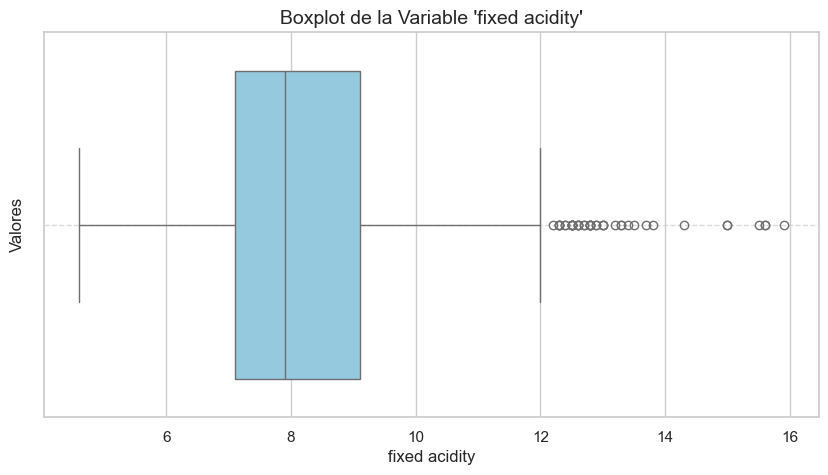

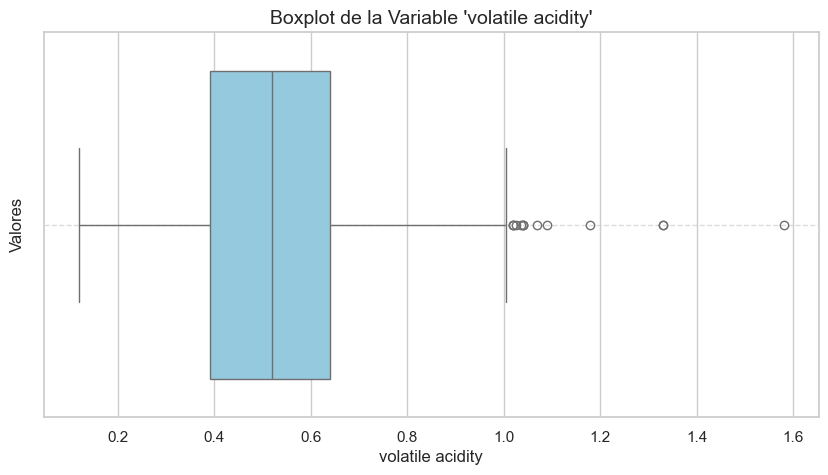

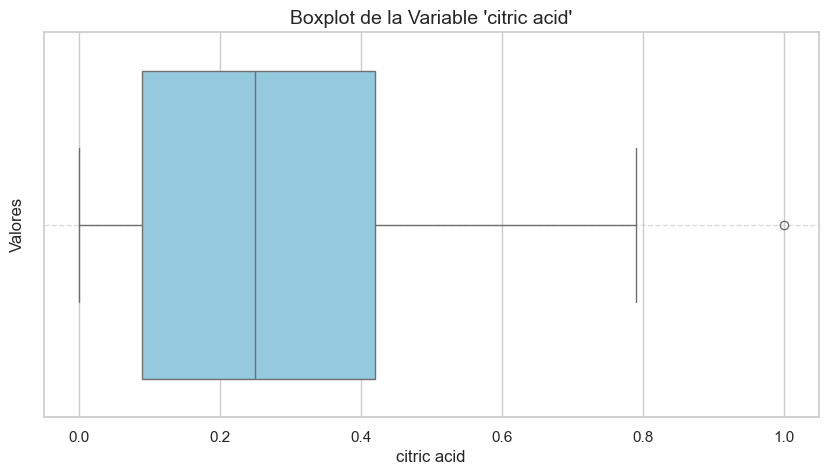

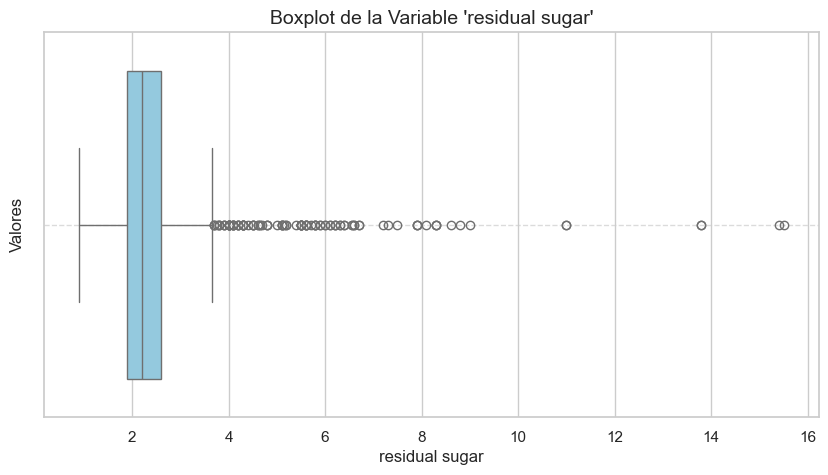

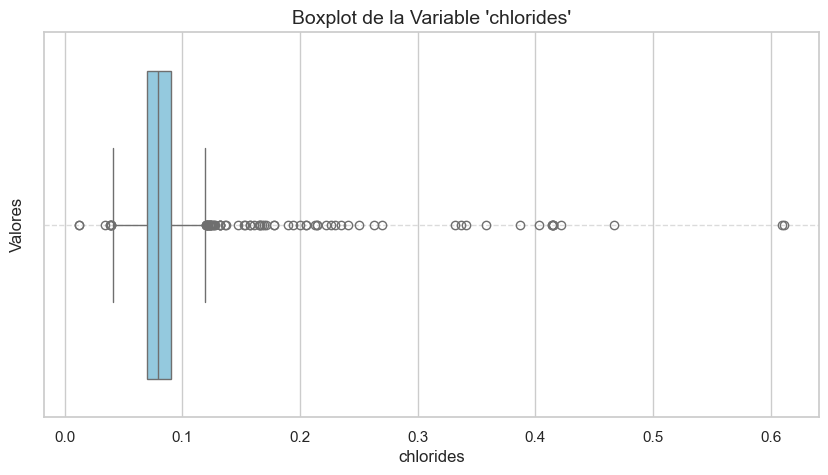

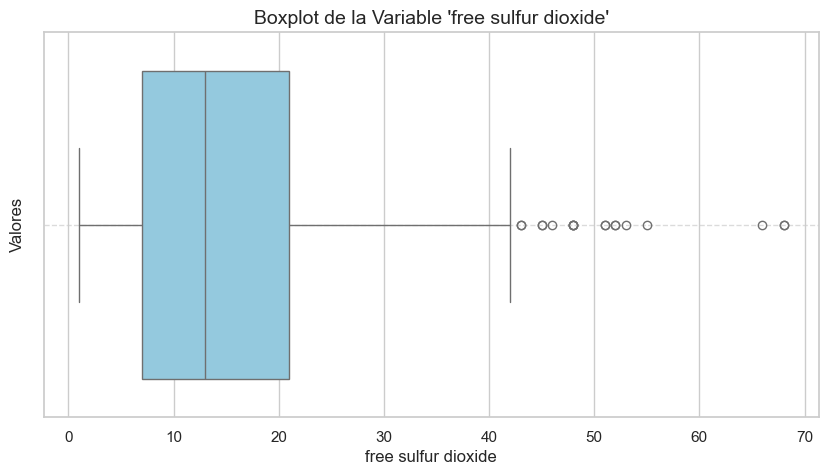

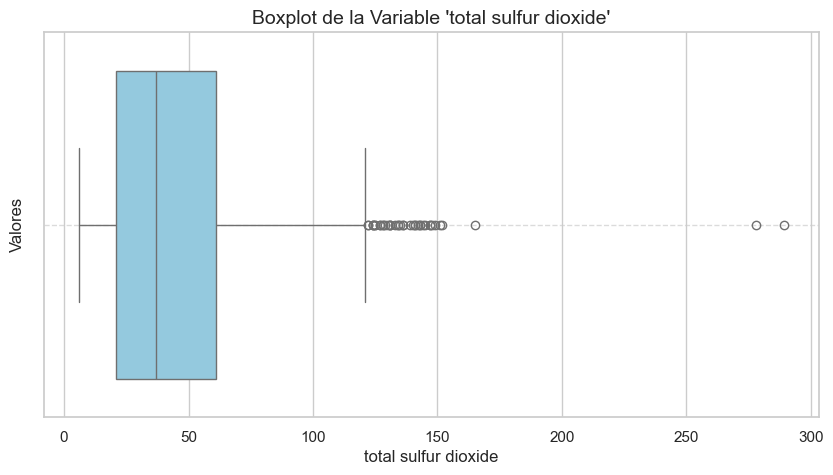

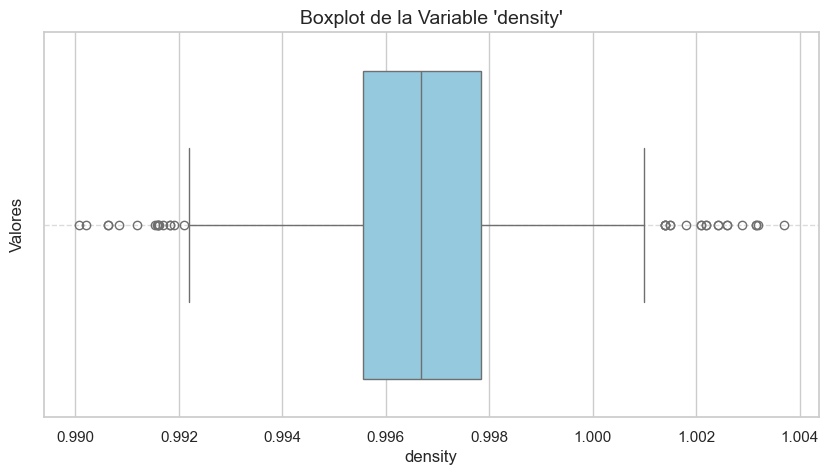

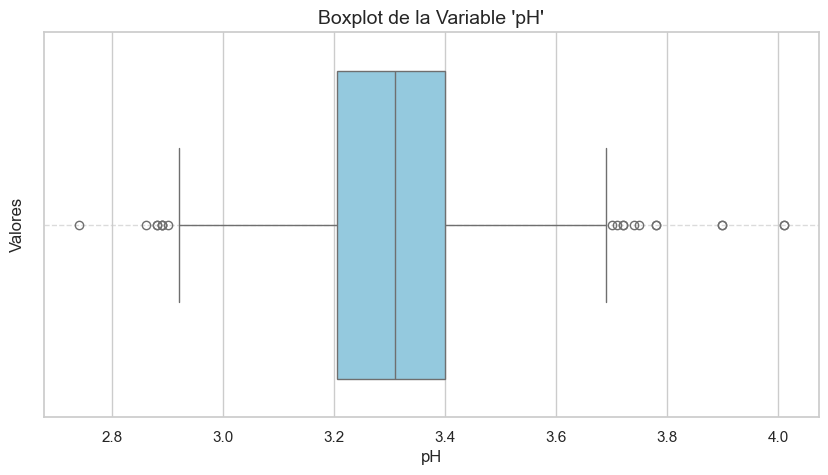

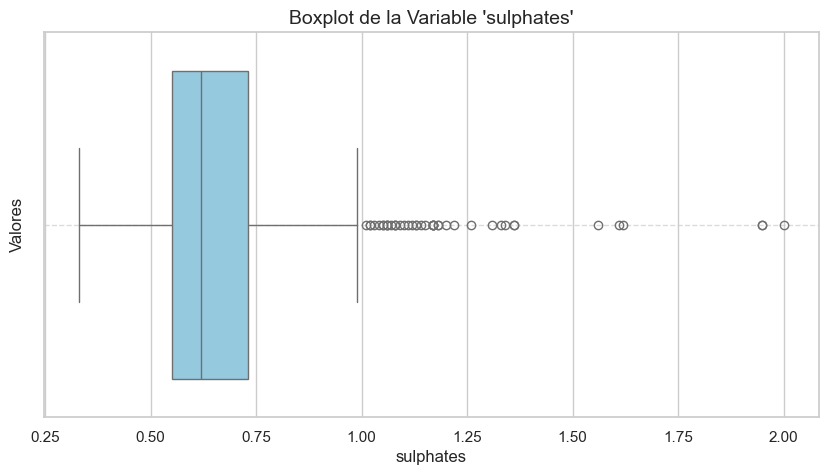

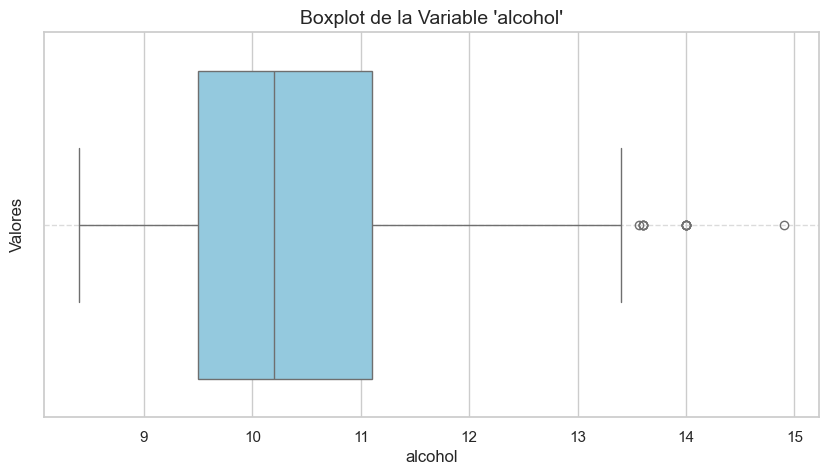

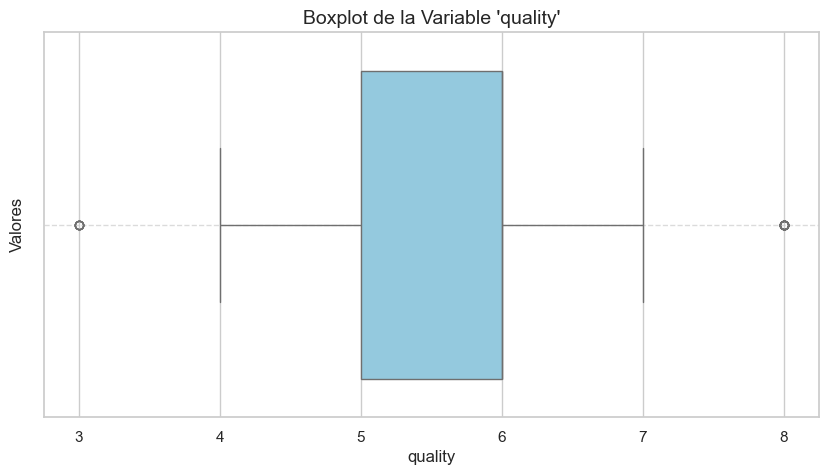

In [8]:
# Configuración general para gráficos
sns.set(style="whitegrid")

# Lista de columnas numéricas excluyendo 'Id'
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.drop('Id')

# Crear un boxplot para cada columna numérica excepto 'Id'
print("\n--- Generando Boxplots para cada variable numérica ---")

for columna in columnas_numericas:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=columna, color="skyblue")
    plt.title(f"Boxplot de la Variable '{columna}'", fontsize=14)
    plt.xlabel(columna, fontsize=12)
    plt.ylabel("Valores", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


He concluido que los valores extremos no son errores sino datos razonables dado el contexto, por lo tanto no los eliminaré

#### Mapa de calor

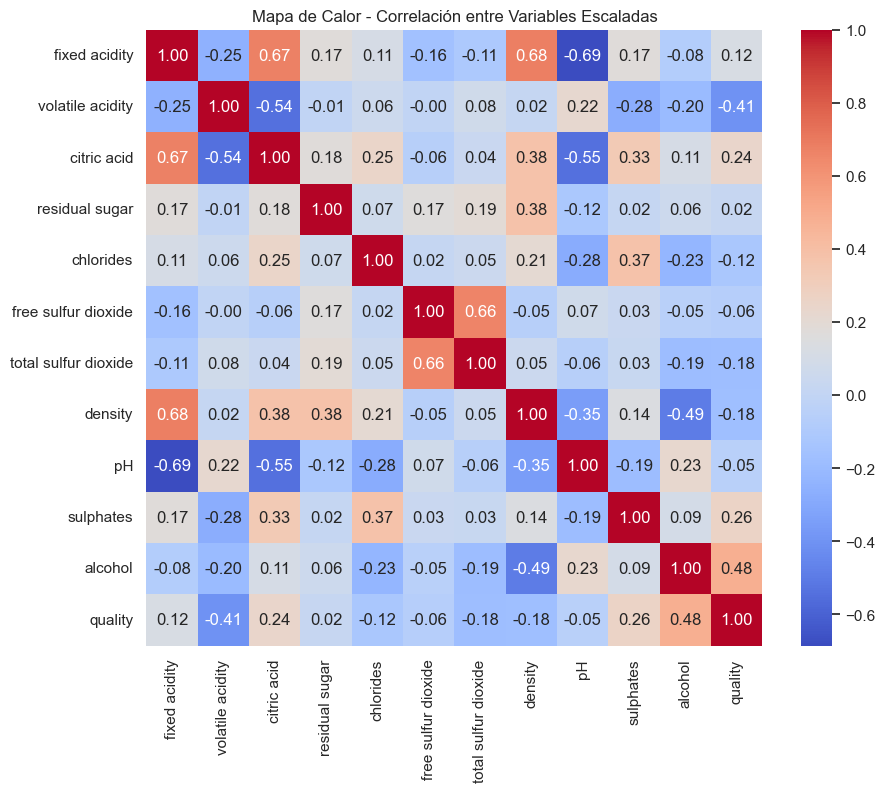

In [9]:

# Identificar variables numéricas continuas para escalar
variables_a_escalar = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col != 'Id']

# Escalar las variables seleccionadas
scaler = StandardScaler()
df_scaled = df.copy()  # Crear una copia para preservar los datos originales
df_scaled[variables_a_escalar] = scaler.fit_transform(df[variables_a_escalar])

# Crear la matriz de correlación
correlacion = df_scaled[variables_a_escalar].corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Mapa de Calor - Correlación entre Variables Escaladas')
plt.show()

# Decidí directamente eliminar la variable Id
df_scaled= df_scaled.drop(columns=['Id'])

El análisis exploratorio del conjunto de datos de calidad de vino reveló varias características clave y desafíos. Las variables están escaladas y bien distribuidas, con algunas como volatile acidity y residual sugar presentando valores atípicos significativos, como se observa en los boxplots. La correlación entre las variables muestra patrones interesantes: alcohol tiene una correlación positiva moderada con quality (0.48), lo que sugiere que niveles más altos de alcohol podrían estar relacionados con vinos de mayor calidad. Por otro lado, volatile acidity tiene una correlación negativa significativa con quality (-0.41), indicando que niveles más altos de acidez volátil podrían disminuir la calidad del vino. Variables como density y pH presentan una correlación negativa moderada entre sí, mientras que citric acid muestra una asociación positiva con fixed acidity (0.67).

Un desafío único es la presencia de valores extremos en varias variables, como residual sugar y total sulfur dioxide, lo que puede influir en los modelos predictivos y requiere considerar técnicas como el manejo de outliers. La variable objetivo quality está moderadamente balanceada, pero su rango limitado (de 3 a 8) podría restringir el análisis en términos de variabilidad. Este conjunto de datos, aunque limpio y bien estructurado, requiere ajustes para mitigar los valores atípicos y explorar su impacto en la calidad del vino.